# Datasource

https://github.com/owid/covid-19-data/tree/master/public/data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import requests
#from bs4 import BeautifulSoup
#import datetime
#import re



pd.set_option("display.max.rows",None)

# Data loading and colomn selection

In [4]:
path='D:\DataSets\Corona\World\CORONA_WORLD_II\owid_covid.csv'
path="/".join(path.split('\\'))
df=pd.read_csv(path)

In [5]:
df_germany=df[df.location=='Germany'].copy()

In [6]:
drop_columns=['iso_code',
             'continent',
             'new_cases_smoothed',
             'new_deaths_smoothed'
             'new_tests',
             ]


for i in drop_columns:
    if i in df_germany.columns:
        df_germany.drop(labels=i,
                        axis=1,
                        inplace=True)
        

# Time series Pre-processing

In [7]:
df_germany['date']=pd.to_datetime(df_germany['date'],dayfirst=False)

In [8]:
df_germany.set_index(df_germany['date'],inplace=True)

In [9]:
df_germany=df_germany.asfreq('D')

# First Look on the data

In [10]:
f=pd.melt(df_germany,
         id_vars='date',
         value_vars=['new_cases',
                   'total_cases',
                   'new_deaths',
                   'total_deaths',
                   'icu_patients',
                   ])

#die Melt brauche ich aktuell nicht

In [11]:
#*********************************************************# 
#Änderung/Hinzufügen von Spalten zum Ändern der Auswertung#
#*********************************************************#

l=['new_cases','total_cases','new_deaths','total_deaths','icu_patients','total_cases_per_million']

In [12]:
for i in l:
    print(f'{i}: {df_germany[i].isna().any()}\nSum: {df_germany[i].isna().sum()}\n')

#Die NaNs kommen zustande, da es bis Mitte März 2020 noch keine Toten/ICU gab

new_cases: False
Sum: 0

total_cases: False
Sum: 0

new_deaths: True
Sum: 42

total_deaths: True
Sum: 42

icu_patients: True
Sum: 53

total_cases_per_million: False
Sum: 0



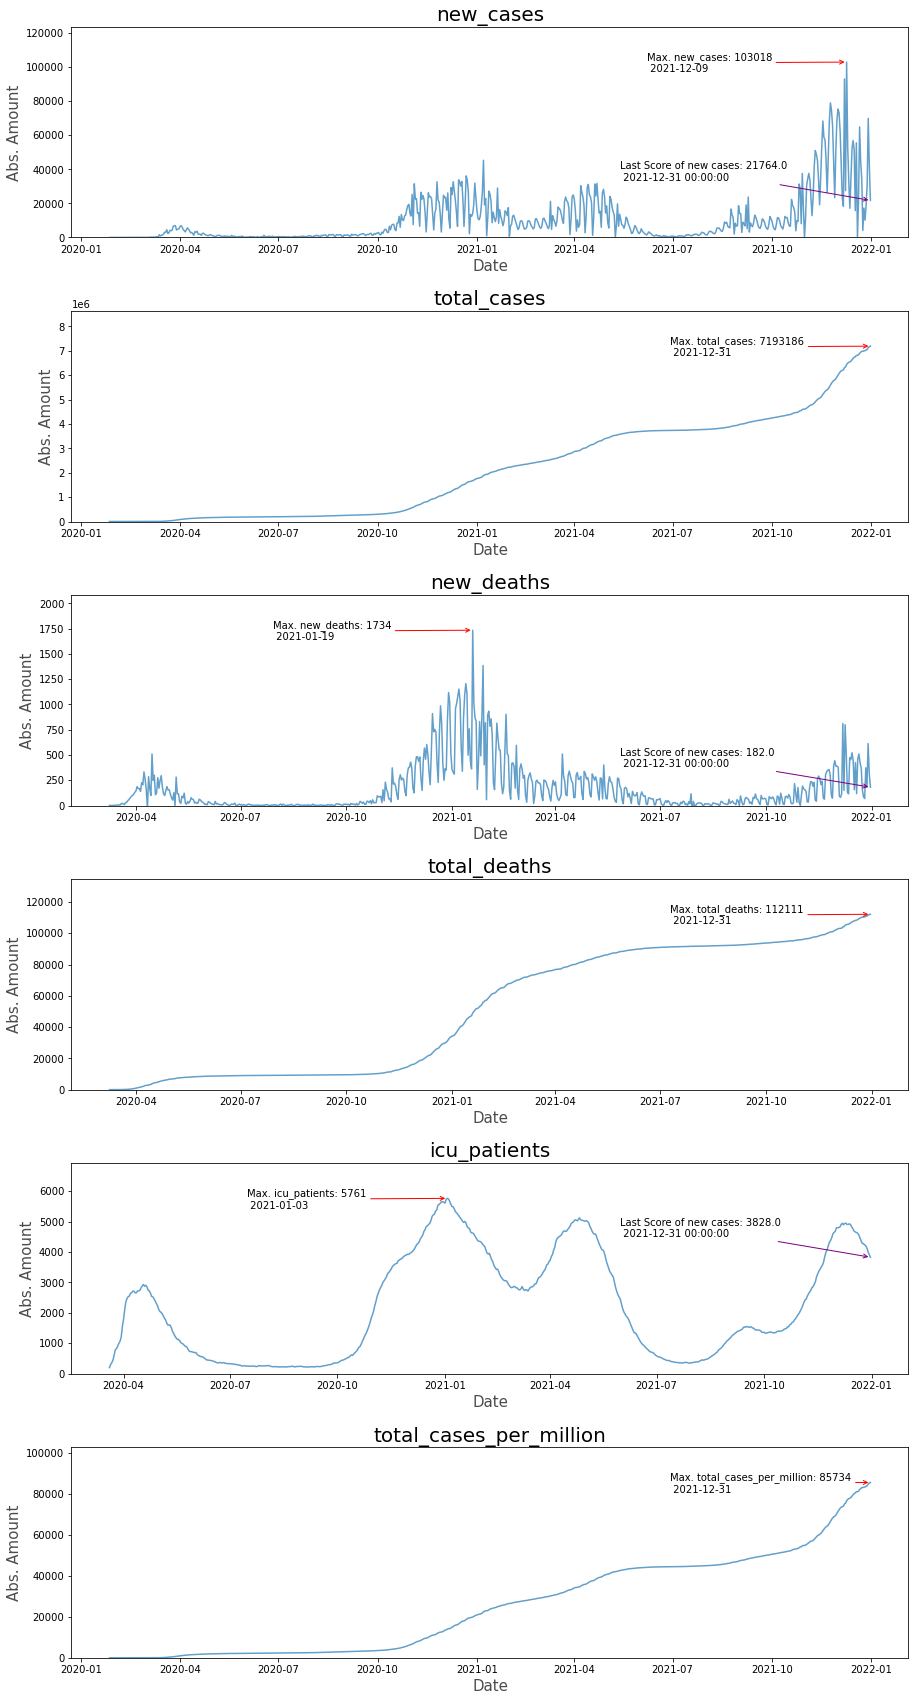

In [21]:
fig,ax=plt.subplots(nrows=len(l),ncols=1,figsize=(15,30))


for counter, value in enumerate(l):
    
    x_max_cor=df_germany[value].index[df_germany[value]==df_germany[value].max()]
    y_max_cor=df_germany[value].max()
    x_last_cor=df_germany.index[-1]
    y_last_cor=df_germany[value][-1]
    
    
    ax[counter].plot(df_germany[value],alpha=0.7)

    ax[counter].set_ylim([0,df_germany[value].max()*1.2])

    ax[counter].set_title(label=value,size=20)
    
    ax[counter].set_xlabel('Date',size=15,alpha=0.7)
    
    ax[counter].set_ylabel('Abs. Amount',size=15,alpha=0.7)


    ax[counter].annotate(text=f'Max. {value}: {int(y_max_cor)}\n {x_max_cor.date[0]}',
                  xy=[x_max_cor,y_max_cor],
                   xytext=(-200,-10),
                   textcoords='offset pixels',
                   arrowprops={'arrowstyle':'->','color':'red'}
                  )
    if x_last_cor!=x_max_cor:
        ax[counter].annotate(
            text=f'Last Score of new cases: {y_last_cor}\n {x_last_cor}',
            xy=[x_last_cor,y_last_cor],
            textcoords='offset pixels',
            xytext=(-250,20),
            arrowprops={'arrowstyle':'->','color':'purple'}
            )

      
plt.subplots_adjust(hspace=0.35, wspace=0.4)
plt.show()

fig.savefig('Corona_Overview.png')
##Den gleichen Facetgrid mit ncols=2 machen und andere Krankheiten Zeigen


In [14]:
df_germany.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per

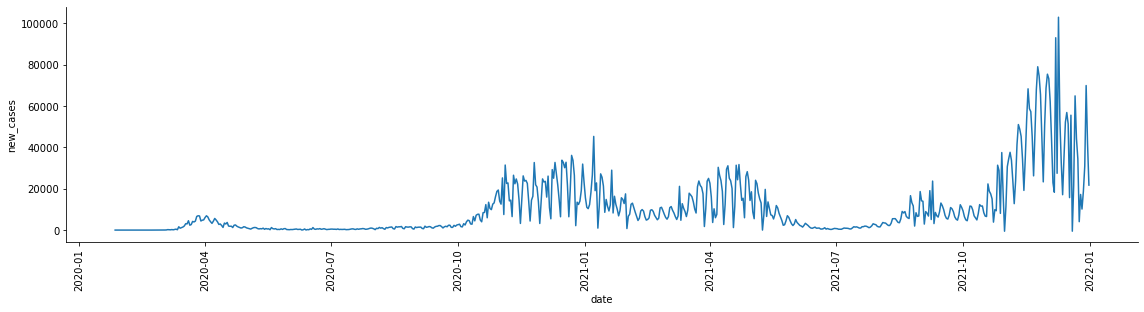

In [15]:
sns.relplot(
    data=df_germany,
    kind='line',
    x=df_germany.index,
    y=df_germany.new_cases,
    height=4.0,
    aspect=4.0
    


)

plt.title()
plt.xticks(rotation=90)
plt.show()